# Kmeans clustering of solar plants
Read in a file of 671 operating solar plants that produce 96% of California's solar power and group into 30 <a href='#clusters'>clusters</a> that will have similar weather forecasts.

### Imports

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

#### Define color mapping function

In [2]:
def rgb_calc(minn,maxx,val):
    scaled = (val-minn)/(maxx-minn)
    if scaled <= 0.25:
        return [1,4*scaled,0]
    if scaled > 0.25 and scaled <= 0.5:
        return [(-4)*scaled+2,1,0]
    if scaled > 0.5 and scaled <= 0.75:
        return [0,1,4*scaled-2]
    if scaled > 0.75:
        return [0,(-4)*scaled+4,1]
    else:
        return [0,0,0]

### Read in data

In [3]:
main_solar = pd.read_csv('../datasets/main_solar.csv')
print(main_solar.shape)
main_solar.head(3)

(671, 58)


,OBJECTID_12_13,Plant_ID,Plant_Alias,Plant_Label,MW,Gross_MWh,Net_MWh,General_Fuel,Status,STEP_License_Status,...,Capacity_Factor,Income_Percent,Project_Location,Creator,Creator_Date,Last_Editor,Last_Editor_Date,GlobalID,cluster,color
0,9,S0155,Fleshman Solar Farm,Kost (Fleshman Solar Farm),3.00,5556.0,5531.0,Solar,Operating,NaN,...,0.209889,64.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,c9bd60cc-014a-4b05-bef0-5d7e909fc82a,4,"[1, 0.5517241379310345, 0]"
1,11,S0284,Bruceville Holdings LLC; Bruceville Rd. Solar ...,RE Bruceville Solar 1,6.65,11418.0,11418.0,Solar,Operating,NaN,...,0.195468,122.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,7af0837e-dd75-45f4-8d2a-8abe7483ffc0,4,"[1, 0.5517241379310345, 0]"
2,12,S0154,Lawrence Solar Farm Pam,Point Pleasant (Lawrence Solar Farm),1.00,1786.0,1775.0,Solar,Operating,NaN,...,0.202072,122.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,da8f27d0-4782-4134-a53d-c7e45010414b,4,"[1, 0.5517241379310345, 0]"


### Fit KMeans cluster model with 30 clusters

In [4]:
X = main_solar[['Longitude','Latitude']]

km = KMeans(n_clusters=30,random_state=2020)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2020, tol=0.0001, verbose=0)

### Label plants with cluster number and assign a plotting color

In [5]:
main_solar['cluster'] = km.labels_
main_solar['color'] = main_solar['cluster'].map(lambda p: rgb_calc(0,29,p))

<a id="clusters"><a>

### Visulize clusters

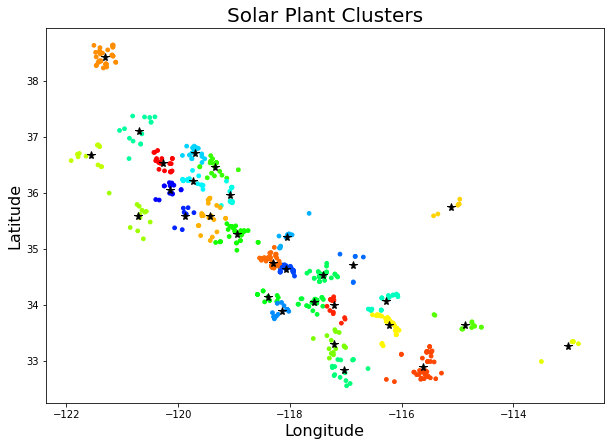

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(main_solar['Longitude'],main_solar['Latitude'],c=main_solar['color'],s=14)
ax.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],'k*',markersize=8)
ax.set_aspect('equal')
plt.title('Solar Plant Clusters',fontsize=20)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16);

#### Solar Plant Clusters
- Each color denotes a new cluster
- The black stars show the cluster centroids
- Each centroid will be used to collect UV index data to predict solar output for the given cluster

### Group solar plants by cluster and aggregate total capacity in MW

In [7]:
solar_clusters = main_solar.groupby('cluster').sum()
solar_clusters['Longitude'] = km.cluster_centers_[:,0]
solar_clusters['Latitude'] = km.cluster_centers_[:,1]
solar_clusters = solar_clusters[['Longitude','Latitude','MW']]
print(solar_clusters.shape)
solar_clusters.head()

(30, 3)


,Longitude,Latitude,MW
cluster,,,
0,-120.266187,36.543670,766.100000
1,-117.213832,34.000467,103.090000
2,-115.612158,32.885355,1637.707195
3,-118.296688,34.748518,2308.260000
4,-121.304171,38.434039,155.110000


### Export data

In [8]:
# solar_clusters.to_csv('../datasets/solar_clusters.csv',index=False)